In [1]:
import pandas as pd
import pubchempy as pcp

In [2]:
df = pd.read_csv('resultScrapeActiveCompoundPersticide.csv')

In [5]:
df.head()

,CID,Status,Substance
0,5367650,1,
1,5283292,1,
2,5363095,1,
3,5363237,1,
4,28169,0,


In [7]:
df['CID'][0]

5367650

In [11]:
df['Substance'] = ''
for i in range(0, len(df)):
    compound = pcp.get_compounds(int(df['CID'][i]))[0]
    df['Substance'][i] = str(compound.canonical_smiles)

/tmp/ipykernel_2679/2423726424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Substance'][i] = str(compound.canonical_smiles)


In [17]:
df.to_csv('ActiveCompoundPersticide.csv', index=False)

In [25]:
cek = pd.read_csv('ActiveCompoundPersticide.csv')
len(cek)

948

In [26]:
cek.head()

,CID,Status,Substance
0,5367650,1,CCC=CCCCCCCCCCCOC(=O)C
1,5283292,1,CCCCC=CCCCCO
2,5363095,1,CCCCC=CCCCCOC(=O)C
3,5363237,1,CCCC=CCCCCCCCOC(=O)C
4,28169,0,CCC=CCCCCCCCCOC(=O)C


<AxesSubplot: >

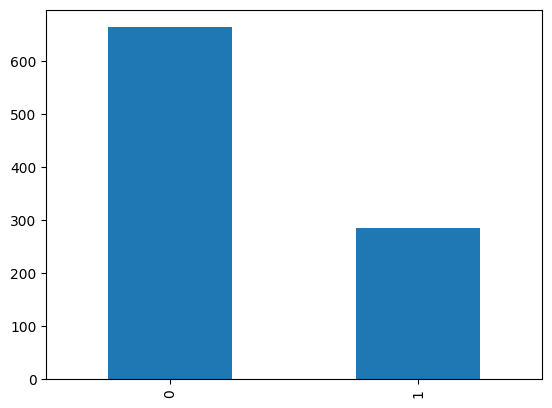

In [27]:
# tampilkan frekuensi data Status dalam bentuk diagram batang
cek['Status'].value_counts().plot(kind='bar')


In [28]:
# hapus hapus sebagian data yang memiliki status 0 sehingga frekuensi data status 0 dan 1 sama
satu = cek[cek['Status'] == 1]
nol = cek[cek['Status'] == 0]
nol = nol.sample(n=len(satu))
cek = pd.concat([satu, nol])

<AxesSubplot: >

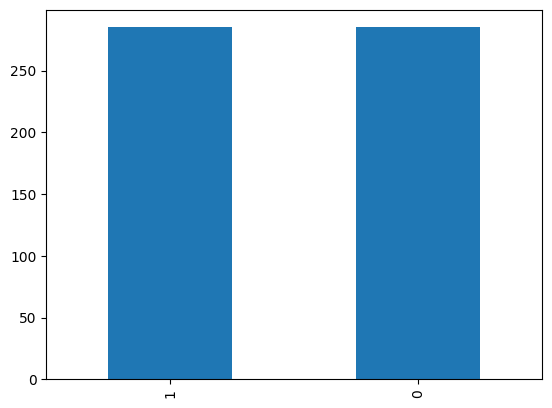

In [29]:
# tampilkan frekuensi data Status dalam bentuk diagram batang
cek['Status'].value_counts().plot(kind='bar')


In [30]:
cek.to_csv('ActiveCompoundPersticide.csv', index=False)